<a href="https://colab.research.google.com/github/ItsFoD/Texture-Detection/blob/main/Texture_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from skimage.io import imread

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def load_images_from_folder(root_folder):
    images = []
    labels = []
    # array vs list : array = fixed size -> list uses something like a pointer to keep adding onto it
    for root, dirs, files in os.walk(root_folder):
        for filename in files:
            try:
                img = imread(os.path.join(root, filename))
                if img is not None:
                    images.append(img)
                    labels.append(filename.split("-")[0])
            except Exception as e:
                print(f"Error loading image {filename}: {e}")

    return np.array(images), np.array(labels)

In [4]:
test = "/content/drive/MyDrive/ColabNotebooks/textures/testing"
train = "/content/drive/MyDrive/ColabNotebooks/textures/training"

In [5]:
train_images, train_labels = load_images_from_folder(train)
test_images, test_labels = load_images_from_folder(test)

print("Train Labels:", train_labels)
print("Test Labels:", test_labels)

Train Labels: ['canvas1' 'canvas1' 'canvas1' 'canvas1' 'canvas1' 'canvas1' 'canvas1'
 'canvas1' 'canvas1' 'canvas1' 'canvas1' 'canvas1' 'canvas1' 'canvas1'
 'canvas1' 'canvas1' 'canvas1' 'canvas1' 'canvas1' 'canvas1' 'canvas1'
 'canvas1' 'canvas1' 'canvas1' 'canvas1' 'canvas1' 'canvas1' 'canvas1'
 'canvas1' 'canvas1' 'cushion1' 'cushion1' 'cushion1' 'cushion1'
 'cushion1' 'cushion1' 'cushion1' 'cushion1' 'cushion1' 'cushion1'
 'cushion1' 'cushion1' 'cushion1' 'cushion1' 'cushion1' 'cushion1'
 'cushion1' 'cushion1' 'cushion1' 'cushion1' 'cushion1' 'cushion1'
 'cushion1' 'cushion1' 'cushion1' 'cushion1' 'cushion1' 'cushion1'
 'cushion1' 'cushion1' 'sand1' 'sand1' 'sand1' 'sand1' 'sand1' 'sand1'
 'sand1' 'sand1' 'sand1' 'sand1' 'sand1' 'sand1' 'sand1' 'sand1' 'sand1'
 'sand1' 'sand1' 'sand1' 'sand1' 'sand1' 'sand1' 'sand1' 'sand1' 'sand1'
 'sand1' 'sand1' 'sand1' 'sand1' 'sand1' 'sand1' 'linseeds1' 'linseeds1'
 'linseeds1' 'linseeds1' 'linseeds1' 'linseeds1' 'linseeds1' 'linseeds1'
 'lins

In [6]:
print("Train images:", train_images)
print("Test images:", test_images)

Train images: [[[ 73  60  63 ...  49  79 152]
  [109  73  44 ...  52  57  87]
  [106  65  49 ...  54  44  87]
  ...
  [138 130 117 ... 133 184 195]
  [103 119 119 ... 152 187 190]
  [ 95 111 141 ... 149 152 163]]

 [[172 154 185 ... 159 167 170]
  [121 124 172 ... 154 157 164]
  [137 144 147 ... 197 180 134]
  ...
  [200 246 248 ... 106 137 129]
  [159 223 197 ... 116 124 134]
  [152 154 131 ... 124 109 129]]

 [[ 77  90 120 ... 135 109 146]
  [ 77 114 148 ... 137 114 152]
  [ 84 118 144 ... 111 114 139]
  ...
  [ 94  73  77 ... 101 118  62]
  [ 79  64 103 ...  90  84  73]
  [ 88  77 111 ...  77  73  94]]

 ...

 [[ 90 100  76 ... 106 113 113]
  [115 100  89 ... 101 124 111]
  [ 66  60 120 ... 126 114  93]
  ...
  [ 80  86 123 ... 115 110  86]
  [118 123 109 ... 128 127 127]
  [ 92 127 147 ... 105  89 103]]

 [[105 100  71 ...  73 106  56]
  [100  78  62 ...  54  69  96]
  [ 85 108  91 ...  62  61 111]
  ...
  [114 162 166 ... 105  98  82]
  [131 158 152 ... 129 100  78]
  [147 109  94

In [7]:
train_images.shape

(180, 576, 576)

In [8]:
train_labels

array(['canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1',
       'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1',
       'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1',
       'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1',
       'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1', 'canvas1',
       'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1',
       'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1',
       'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1',
       'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1',
       'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1',
       'cushion1', 'cushion1', 'cushion1', 'cushion1', 'cushion1',
       'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1',
       'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1',
       'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1', 'sand1',
       'sand1', 'sand1'

<ipython-input-9-8e6c9ceba36b>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


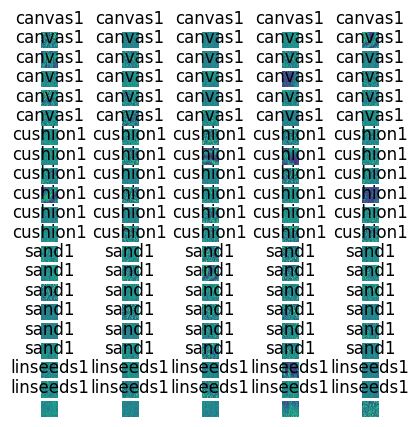

In [9]:
import random
fig, axes = plt.subplots(20, 5, figsize=(5, 5))
axes = axes.flatten()
for i in range(100):
    axes[i].imshow(train_images[random.choice(range(len(train_images)))])
    axes[i].set_title(train_labels[i])
    axes[i].axis('off')
plt.tight_layout()
plt.show()


In [10]:
test_images.shape

(60, 576, 576)

In [11]:
train_images.shape

(180, 576, 576)

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.fit_transform(test_labels)

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)


In [13]:
train_labels.shape


(180,)

In [14]:
input_shape = (576, 576,1)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#dropout
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 574, 574, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 287, 287, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2635808)           0         
                                                                 
 dropout (Dropout)           (None, 2635808)           0         
                                                                 
 dense (Dense)               (None, 6)                 15814854  
                                                                 
Total params: 15815174 (60.33 MB)
Trainable params: 15815174 (60.33 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=17,
          validation_data=(test_images*0.3, test_labels*0.3))

Epoch 1/17
6/6 [==============================] - 8s 617ms/step - loss: 25707.2109 - accuracy: 0.1389 - val_loss: 4761.0254 - val_accuracy: 0.1667
Epoch 2/17
6/6 [==============================] - 1s 146ms/step - loss: 24747.5586 - accuracy: 0.1667 - val_loss: 11659.2520 - val_accuracy: 0.0000e+00
Epoch 3/17
6/6 [==============================] - 1s 138ms/step - loss: 16625.5762 - accuracy: 0.1833 - val_loss: 7545.1895 - val_accuracy: 0.0000e+00
Epoch 4/17
6/6 [==============================] - 1s 138ms/step - loss: 6992.2612 - accuracy: 0.1500 - val_loss: 1288.8762 - val_accuracy: 0.1667
Epoch 5/17
6/6 [==============================] - 1s 144ms/step - loss: 4735.0044 - accuracy: 0.3667 - val_loss: 1774.4792 - val_accuracy: 0.0000e+00
Epoch 6/17
6/6 [==============================] - 1s 145ms/step - loss: 1680.5732 - accuracy: 0.4278 - val_loss: 1251.3307 - val_accuracy: 0.1667
Epoch 7/17
6/6 [==============================] - 1s 143ms/step - loss: 770.8990 - accuracy: 0.4444 - val_lo

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_images = np.expand_dims(train_images, axis=-1)
datagen.fit(train_images)

model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          steps_per_epoch=len(train_images) // 32,  # Adjust based on your dataset size
          epochs=20,
          validation_data=(test_images, test_labels))

Epoch 1/20
5/5 [==============================] - 4s 734ms/step - loss: 132.0850 - accuracy: 0.4459 - val_loss: 173.1446 - val_accuracy: 0.4167
Epoch 2/20
5/5 [==============================] - 4s 762ms/step - loss: 66.8714 - accuracy: 0.6081 - val_loss: 87.2715 - val_accuracy: 0.7167
Epoch 3/20
5/5 [==============================] - 6s 1s/step - loss: 43.8171 - accuracy: 0.6216 - val_loss: 54.0041 - val_accuracy: 0.6833
Epoch 4/20
5/5 [==============================] - 5s 930ms/step - loss: 35.2772 - accuracy: 0.6892 - val_loss: 144.7581 - val_accuracy: 0.3833
Epoch 5/20
5/5 [==============================] - 4s 673ms/step - loss: 51.6198 - accuracy: 0.6351 - val_loss: 108.7211 - val_accuracy: 0.6667
Epoch 6/20
5/5 [==============================] - 3s 677ms/step - loss: 28.8641 - accuracy: 0.7095 - val_loss: 37.7957 - val_accuracy: 0.7167
Epoch 7/20
5/5 [==============================] - 4s 986ms/step - loss: 64.4765 - accuracy: 0.6081 - val_loss: 65.1333 - val_accuracy: 0.5833
Epoch